In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('/content/gooppang.csv')
df.describe()

,age,basket,monthly_spend,shipping_fee,tenure
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000
mean,36.491783,32.651012,112.705915,16.573888,7.711267
std,10.297822,18.738796,38.791671,7.528190,6.575851
min,18.000000,5.500000,17.370000,0.000000,1.000000
25%,29.000000,23.500000,87.190000,15.000000,3.000000
50%,36.000000,29.500000,106.575000,20.000000,6.000000
75%,43.000000,37.000000,131.240000,20.000000,10.000000
max,87.000000,257.600000,503.460000,85.350000,60.000000


In [3]:
df.dtypes

age              float64
basket           float64
checkout            bool
region            object
coupon              bool
gender            object
monthly_spend    float64
shipping_fee     float64
subscriber          bool
tenure           float64
dtype: object

# 배송비(`shipping_fee`)의 정확한 정의는?

## 배송지역별 배송료 무료 금액 적용 전? 후?

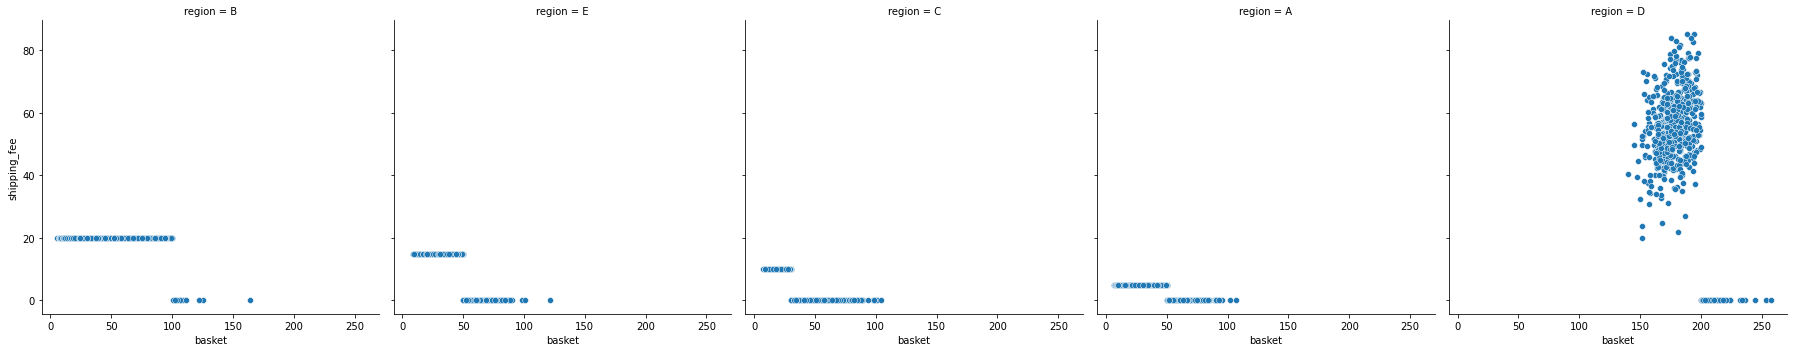

In [4]:
sns.relplot(
  x='basket', 
  y='shipping_fee', 
  col='region', 
  kind='scatter', 
  data=df,
)

## `shipping_fee` 금액은 쿠폰 적용 전? 후?

In [5]:
# 쿠폰 보유한 유저 중 shipping_fee > 0인 경우가 있으면, shipping_fee는 쿠폰 적용 전
(
  df
  .loc[lambda d: (d.shipping_fee > 0) & d.coupon]
  .shipping_fee
  > 0
).any()

True

## 연간회원(`subscriber`) 배송료 무료 혜택 적용 전? 후?

In [6]:
# 연간 회원 유저 중 shipping_fee > 0인 경우가 있으면, shipping_fee는 쿠폰 적용 전
(
  df
  .loc[lambda d: (d.shipping_fee > 0) & d.subscriber]
  .shipping_fee
  > 0
).any()

True

# 장바구니 총액(`basket`)은 배송비(`shipping_fee`) 포함?

* 단순한 접근법: 배송비를 낸 경우와 내지 않은 경우의 총액(basket)분포 비교
  * 쿠폰, 연간회원은 제외
  * `shipping_fee > 0` 인 경우 `mean(basket)`이 더 크다면, `basket`에 `shipping_fee`가 포함?

In [7]:
(
    df
    .loc[lambda d: (~ d.coupon) & (~ d.subscriber)]
    .assign(paid_shipping=lambda d: (d.shipping_fee > 0) * (1 - d.coupon) * (1 - d.subscriber))
    .groupby('paid_shipping')
    .agg({'basket': ('min', 'mean', 'max')})
)

basket                  
                 min       mean    max
paid_shipping                         
0               30.1  47.814429  234.0
1                5.5  31.436564  199.7